In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


# Obbligazioni (titoli a reddito fisso)

In questo file vengono trattate le obbligazioni a tasso di rendimento fisso.

### Valore futuro

In [2]:
# pv = principal, somma investita inizialmente
# r = tasso di interesse annuo
# n = numero di anni
# viene applicata la formula per calcolare il valore futuro di un'obbligazione soggetta ad interesse composto e pagamento annuo
def fv_f(pv,r,n):
    return pv*(1+r)**n
fv=fv_f(100,0.04,10)
print(fv)

148.02442849183444


### Valore attuale

In [3]:
# viene applicata la formula del discounted cash flow model senza dividendi (quindi senza la parte con la sommatoria)
def pv_f(fv,r,n):
    """Objective: estimate present value
              fv: fture value
              r : discount period rate
              n : number of periods
        formula : fv/(1+r)**n      
           e.g.,
           >>>pv_f(100,0.1,1)
           90.9090909090909
           >>>pv_f(r=0.1,fv=100,n=1)
           90.9090909090909
           >>>pv_f(n=1,fv=100,r=0.1)
           90.9090909090909
    """
    return fv/(1+r)**n

In [4]:
pv_f(100, 0.02, 10)

82.03482998751551

### Cash flows

Creiamo un array che rappresenta una serie di flussi di cassa: in questo caso stiamo facendo riferimento all'investimento precedente, con somma iniziale 100.

In [5]:
cashFlows=np.array([-100,50,40,30])
for cash in cashFlows:
    print(cash)

-100
50
40
30


### Valore attuale netto (NPV) di una serie di flussi di cassa

Consideriamo la serie dei flussi di cassa generati dall'investimento. <br>
Per ciascun flusso di cassa viene calcolato il suo valore presente utilizzando il tasso di sconto indicato (più un flusso di cassa è lontano nel tempo, minore è il suo valore oggi); tutti i valori attualizzati dei flussi di cassa vengono poi sommati per restituire l'attuale valore dell'investimento.

In [6]:
def npv_f(rate, cashflows):
    total = 0.0
    for i in range(0,len(cashflows)):
        total += cashflows[i] / (1 + rate)**i
        #print(total)
    return total

In [7]:
round(npv_f(0.106517, cashFlows),3) # con questo tasso di sconto le entrate attese attualizzate corrispondono alle uscite attese attualizzate (somma 0)

-0.0

### Ricerca del tasso interno di rendimento (IRR) con un ciclo while

Il tasso interno di rendimento è quel tasso di sconto che permette di eguagliare i flussi di cassa attesi (attualizzati) in uscita e i flussi di cassa attesi (attualizzati) in entrata. <br>
__PER CAPIRE__: se si calcola il valore attuale netto (formula precedente) con il tasso interno di rendimento, allora si ottiene 0 <br>
__NB__: un investimento che ha tasso interno di rendimento maggiore del tasso di rendimento minimo desiderato è redditizio, altrimenti no.


In [8]:
cashFlows=(-100,50,40,30)
r=0
while(r<1.0):
    r+=0.000001
    npv=npv_f(r,cashFlows)
    if(abs(npv)<=0.0001):
        print(round(r, 6))

0.106517


In [9]:
cashFlows=(-100,50,40,30)
r=0
npv = 100
while (abs(npv)>=0.0001):
    r+=0.000001
    npv=npv_f(r,cashFlows)

print(round(r, 6))

0.106517


In [10]:
#problemi con i segni dei flussi di cassa TODO: chiedere che minchia significa

cashFlows=(550,-500,-500,-500,1000)
r=0
while(r<1.0):
    r+=0.000001
    npv=npv_f(r,cashFlows)
    if(abs(npv)<=0.0001):
        print(round(r, 6))


0.071639
0.336733


### Tasso d'interesse e frequenza di capitalizzazione

In [11]:
f = [1, 2, 4, 12, 52, 365] # frequenza dei pagamenti
r = 0.10 # tasso di interesse
tassi = []

for i in f:
    tasso = (1+r/i)**i - 1
    tassi.append(tasso)

for i in tassi:
    print(round(i, 5))

print(round(np.exp(r)-1, 5))

0.1
0.1025
0.10381
0.10471
0.10506
0.10516
0.10517


__PER CAPIRE__: aumentando la frequenza di pagamento annuale, il tasso di interesse effettivo aumenta! Questo è dovuto alla meccanica dell'interesse composto.

### Relazione prezzo / rendimento in un'obbligazione

https://sites.google.com/view/vinegarhill-financelabs/fixed-income-analysis/bond-pricing

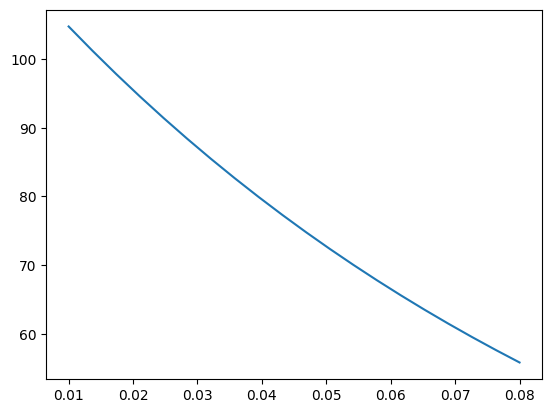

<Figure size 640x480 with 0 Axes>

In [12]:
#plt.style.use('seaborn-whitegrid')

fig = plt.figure()
ax = plt.axes()

m = 2 # numero di pagamenti annui
T = 10 # anni di scadenza
r = 0.015 # tasso di sconto
Face = 100 # principal, somma investita inizialmente
cpr = 0.015

# bond_price = ((Face*cpr/m*(1-(1+r/m)**(-m*T)))/(r/m)) + Face*(1+(r/m))**(-m*T)
# print(bond_price)

def bond_price(m,T,r,Face,cpr):

  return ((Face*cpr/m*(1-(1+r/m)**(-m*T)))/(r/m)) + Face*(1+(r/m))**(-m*T)

fig = plt.figure()

x = np.linspace(0.01, 0.08, 20)

ax.plot(x, bond_price(m,T,x,Face,cpr));

#bond_price(m,T,x,Face,cpr), x


__PER CAPIRE__: all'aumentare del tasso di sconto, il valore dell'obbligazione diminuisce (se aumenta il tasso di sconto, il ritorno che l'obbligazione deve generare per essere vantaggioso aumenta

### Bond pricing con le classi
https://www.youtube.com/watch?v=R6bPKC9ftfY&list=PL62XBUmklIEXKhzCBiQGaJMzRqPMRWgKI


Prezzo di un zero coupon bond (ZCB) con valore facciale F, durata t al tasso di rendimento r

$ P(0,t) = F e^{-rt} $

Tasso di rendimento di uno ZCB dato un valore di rimborso, il prezzo e la scadenza

Se si hanno due prezzi in date diverse (t e t+delta) si può calcolare il rendimento annualizzato dell'investimento nello ZCB

$ r_{t \rightarrow t+\delta} = 1/\delta\cdot \log(P_{t+\delta}/ P_t) \approx 1/\delta(P_{t+\delta} / P_t -1)$

In [13]:
from numpy import log, exp

In [14]:
bond1_price = 99.1338
bond2_price = 97.8925
bond3_price = 96.1531

In [15]:
bond1_mat = 0.5
bond2_mat = 1.0
bond3_mat = 1.5

In [16]:
bond1_face = 100.
bond2_face = 100.
bond3_face = 100.

In [17]:
bond1_ytm = log(bond1_face/bond1_price)/bond1_mat
bond2_ytm = log(bond2_face/bond2_price)/bond2_mat
bond3_ytm = log(bond3_face/bond3_price)/bond3_mat

In [18]:
print(round(bond1_ytm, 5))
print(round(bond2_ytm, 5))
print(round(bond3_ytm, 5))

0.0174
0.0213
0.02615


Cosa sono i tassi a termine (forward rates)
Si  immagina che un rendimenti su una data scadenza T possa essere scomposto in un rendimento da 0 a una data intermedia alpha e da questa a T

$ r_{0 \rightarrow T} \cdot T = r_{0 \rightarrow \alpha} \cdot \alpha + r_{\alpha \rightarrow T} \cdot (T - \alpha).$


$ r_{\alpha \rightarrow T} = r_{0 \rightarrow T} \cdot T/ (T - \alpha) - r_{0 \rightarrow \alpha} \cdot \alpha / (T - \alpha) $


In [19]:
bond1_fwd = log(bond1_face/bond1_price)/bond1_mat
bond2_fwd = log(bond1_price/bond2_price)/(bond2_mat - bond1_mat)
bond3_fwd = log(bond2_price/bond3_price)/(bond3_mat - bond2_mat)

In [20]:
print(round(bond1_fwd, 5))
print(round(bond2_fwd, 5))
print(round(bond3_fwd, 5))

0.0174
0.0252
0.03586


$ r_{fwd, t \rightarrow \delta} = 1/\delta \cdot \log[P(0,t)/P(0,t+\delta)] .$

Costruiamo una   classe per fare le stesse cose

In [21]:
class Bond:
    def __init__(self, face, maturity, price):
        self.face  = face
        self.maturity = maturity
        self.price = price
        self.ytm = log(face/price)/maturity
    def bond_value(self, face, maturity, ytm):
        return face*exp(-maturity*ytm)

bond1 = Bond(100., .5, 99.1338)
bond2 = Bond(100., 1., 97.8925)
bond3 = Bond(100., 1.5, 96.1531)


In [22]:
print(bond1.ytm)

0.017399466353064774


In [23]:
print(bond1.bond_value(bond1.face, bond1.maturity, bond1.ytm).round(4))
print(bond2.bond_value(bond1.face, bond2.maturity, bond2.ytm).round(4))
print(bond3.bond_value(bond3.face, bond1.maturity, bond1.ytm).round(4))

99.1338
97.8925
99.1338


### La curva dei rendimenti

In [24]:
import math as m
import matplotlib.pyplot as plt

In [25]:
class Zero:
    def __init__(self,maturity):
        self.maturity = maturity
    def YTM(self, price):
        return m.pow(100/price, 1/self.maturity) - 1
    def Price(self, ytm):
        return 100/m.pow(1 + ytm, self.maturity)

In [26]:
maturities = [1, 2, 5, 10, 15, 30]

In [27]:
yields = [0.012, 0.015, 0.0180, 0.025, 0.028, 0.0306]

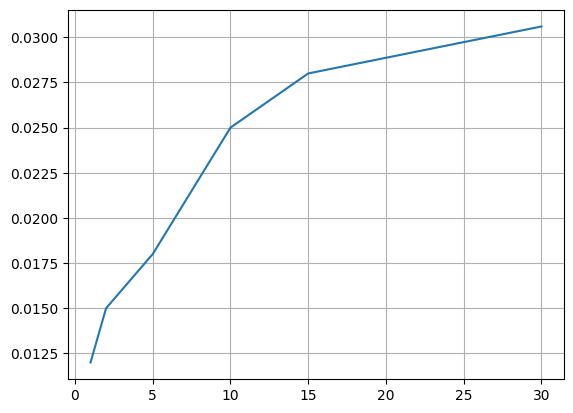

In [28]:
plt.plot(maturities, yields)
plt.grid(True)
plt.show()

In [29]:
bonds = [Zero(i) for i in maturities]
bonds

In [30]:
prices = [bonds[i].Price(yields[i]) for i in range(0, len(bonds))]
prices

[98.81422924901186,
 97.06617486471404,
 91.46629971802828,
 78.11984017257274,
 66.08505870225574,
 40.485159652524025]

Come eliminare un elemento da una lista

In [31]:
maturities.pop(2)

5

In [32]:
maturities

[1, 2, 10, 15, 30]

In [33]:
marketYield = yields.pop(2)
marketYield

0.018

In [34]:
yields

[0.012, 0.015, 0.025, 0.028, 0.0306]

In [35]:
marketPrice = prices.pop(2)
marketPrice

91.46629971802828

In [36]:
prices

[98.81422924901186,
 97.06617486471404,
 78.11984017257274,
 66.08505870225574,
 40.485159652524025]

Trovare un prezzo dove manca con l'interpolazione lineare

In [37]:
import numpy as np

In [38]:
interpolatedPrice = np.interp(10, maturities, prices)
interpolatedPrice

78.11984017257274

In [39]:
interpolatedYield = np.interp(10,maturities, yields)
interpolatedYield

0.025

Interpoliamo i rendimenti

In [40]:
PriceFromInterpolatedYields = bonds[2].Price(interpolatedYield)
PriceFromInterpolatedYields

88.38542876095174

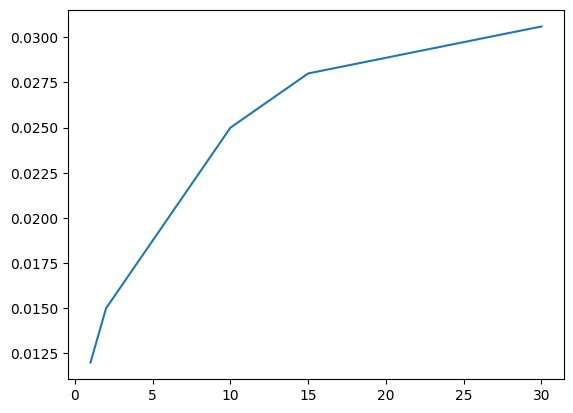

In [41]:
plt.show()
plt.plot(maturities,yields)

In [42]:
maturities = [2,5,10,30]
yields = [0.0249, 0.0246, 0.0266, 0.0306]

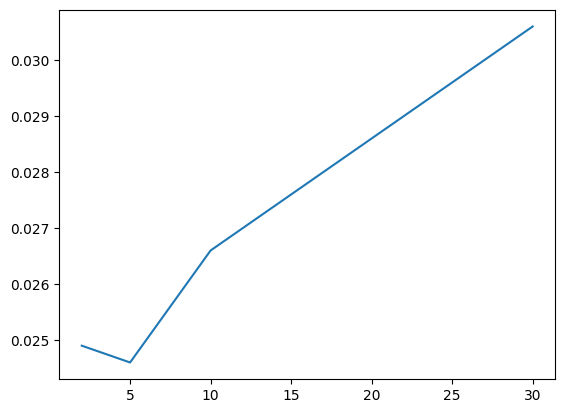

In [43]:
plt.plot(maturities, yields)
plt.show();

### Duration

In [44]:

r = 0.02
CashFlows = [-100, 2, 2, 2, 2, 2, 2, 2, 2, 102]
Years = list(range(0,len(CashFlows)))

In [45]:
Years

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [46]:
PVT = []
NPV = []
for i in Years:
    pay = CashFlows[i]*i/(1+r)**i
    npv = CashFlows[i]/(1+r)**i
    PVT.append(pay)
    NPV.append(npv)
duration = sum(PVT)/sum(NPV[1:])

In [47]:
PVT

[0.0,
 1.9607843137254901,
 3.8446751249519417,
 5.653934007282266,
 7.390763408212114,
 9.057308098299158,
 10.655656586234304,
 12.187842500594792,
 13.655845939041782,
 768.1413340711003]

In [48]:
NPV

[-100.0,
 1.9607843137254901,
 1.9223375624759709,
 1.8846446690940888,
 1.8476908520530284,
 1.8114616196598319,
 1.775942764372384,
 1.7411203572278275,
 1.7069807423802228,
 85.34903711901114]

In [49]:
duration

8.325481440494423

In [50]:
round(sum(NPV[1:]),5)

100.0

In [51]:
c = 5
d = 10
p = 100
nv = 100
CashFlows = np.repeat(c, d+1)
CashFlows

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [52]:
CashFlows[0] = -p
CashFlows

array([-100,    5,    5,    5,    5,    5,    5,    5,    5,    5,    5])

In [53]:
CashFlows[-1] = CashFlows[-1] + nv

In [54]:
CashFlows

array([-100,    5,    5,    5,    5,    5,    5,    5,    5,    5,  105])

In [55]:
len(CashFlows)

11

In [56]:
def duration(p, nv, c, d, r):
    CashFlows = np.repeat(c, d+1)
    CashFlows[0] = -p
    CashFlows[-1] = CashFlows[-1] + nv
    PVT = []
    NPV = []
    for d in range(len(CashFlows)):
        pay = CashFlows[d]*d/(1+r)**d
        #print(pay)
        npv = CashFlows[d]/(1+r)**d
        #print(npv)
        PVT.append(pay)
        NPV.append(npv)
    duration = sum(PVT)/sum(NPV[1:])
    return duration#, PVT, NPV
        

Calcolo della duration

In [57]:
duration(100, 100, 10, 10, 0.10)

6.75902381627515

duration di una rendita
(1 + r) / r

In [58]:
duration(100, 100, 5, 10, 0.05)

8.107821675644052

duration di uno zero coupon T

In [59]:
duration(14.86, 100, 0, 10, 0.1)

10.0

https://www.milanofinanza.it/news/formazione-bond-guida-basi-mercato-obbligazionario-202310142302455329